# EDA on general features & after tokenization

## Import data & modules

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv")

In [4]:
df = pd.read_csv("story_data_new_feats.csv")

## Light general exploration

In [5]:
print(df.columns)

Index(['url', 'story_id', 'soup', 'title', 'author', 'contest_num',
       'won_contest', 'num_likes', 'num_comments', 'story_html',
       'date_published', 'num_sent', 'words', 'num_words', 'unique_words',
       'num_unique_words', 'unique_words_percent', 'punctuation', 'num_cats',
       'cat_Western', 'cat_Adult', 'cat_East', 'cat_Color', 'cat_Christian',
       'cat_School', 'cat_Kids', 'cat_Fiction', 'cat_Holiday', 'cat_Desi',
       'cat_Black', 'cat_Asian', 'cat_Latinx', 'cat_Gay', 'cat_Drama',
       'cat_Adventure', 'cat_Coming', 'cat_Transgender', 'cat_Middle',
       'cat_Indigenous', 'cat_Suspense', 'cat_Nonfiction', 'cat_Young',
       'cat_Thriller', 'cat_Friendship', 'cat_Contemporary', 'cat_Sad',
       'cat_Romance', 'cat_Fantasy', 'cat_Lesbian', 'cat_Mystery',
       'cat_American', 'cat_Christmas', 'cat_Age', 'cat_Bedtime', 'cat_Happy',
       'cat_Teens', 'cat_Speculative', 'cat_Crime', 'cat_Urban', 'cat_People',
       'cat_Creative', 'cat_Horror', 'cat_Inspirati

In [6]:
print('Dataset dimensions:', df.shape)
print('Does the dataset contain NA?', df.isna().any().any())
print('Data types in dataset:')
print(df.dtypes.value_counts())

Dataset dimensions: (887, 68)
Does the dataset contain NA? True
Data types in dataset:
int64      55
object     12
float64     1
dtype: int64


In [7]:
numerical = ['num_likes', 'num_comments', 'num_sent', 'num_words', 'num_unique_words', 'unique_words_percent', 'num_cats']

In [8]:
df[numerical].describe()

,num_likes,num_comments,num_sent,num_words,num_unique_words,unique_words_percent,num_cats
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,14.512965,4.717024,119.040586,1795.350620,659.064262,0.380788,2.828636
std,21.576877,21.759873,52.393809,671.074451,192.155444,0.055200,1.130309
min,0.000000,0.000000,5.000000,941.000000,320.000000,0.215301,1.000000
25%,8.000000,0.000000,80.000000,1204.000000,499.500000,0.340399,2.000000
50%,10.000000,1.000000,111.000000,1602.000000,618.000000,0.380668,3.000000
75%,14.000000,3.000000,148.000000,2289.000000,802.000000,0.417466,3.000000
max,460.000000,420.000000,356.000000,3829.000000,1470.000000,0.545859,8.000000


In [9]:
with pd.option_context('display.max_rows', 1, 'display.max_columns', None): 
    display(df.sample(5))

,url,story_id,soup,title,author,contest_num,won_contest,num_likes,num_comments,story_html,date_published,num_sent,words,num_words,unique_words,num_unique_words,unique_words_percent,punctuation,num_cats,cat_Western,cat_Adult,cat_East,cat_Color,cat_Christian,cat_School,cat_Kids,cat_Fiction,cat_Holiday,cat_Desi,cat_Black,cat_Asian,cat_Latinx,cat_Gay,cat_Drama,cat_Adventure,cat_Coming,cat_Transgender,cat_Middle,cat_Indigenous,cat_Suspense,cat_Nonfiction,cat_Young,cat_Thriller,cat_Friendship,cat_Contemporary,cat_Sad,cat_Romance,cat_Fantasy,cat_Lesbian,cat_Mystery,cat_American,cat_Christmas,cat_Age,cat_Bedtime,cat_Happy,cat_Teens,cat_Speculative,cat_Crime,cat_Urban,cat_People,cat_Creative,cat_Horror,cat_Inspirational,cat_Historical,cat_Science,cat_High,cat_African,cat_Funny
166,https://blog.reedsy.com/short-story/nwhfsa/,nwhfsa,<!DOCTYPE html>\n\n<html>\n<head>\n<meta chars...,My Magical Moment,Mei Wedding,"['Contest', '#71']",NaN,8,0,"<article class=""font-alt submission-content sp...",2020-12-08 19:49:00,121,['Nathan' 'Wassum' 'and' ... 'again' 'The' 'End'],1531,"{'ages', 'on', 'I', 'planned', 'made', ""'d"", '...",613,0.400392,"['7' '.' '.' '.' '(' ')' '.' ',' ',' ',' '.' '...",3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Distributions

Distribution of numerical features:

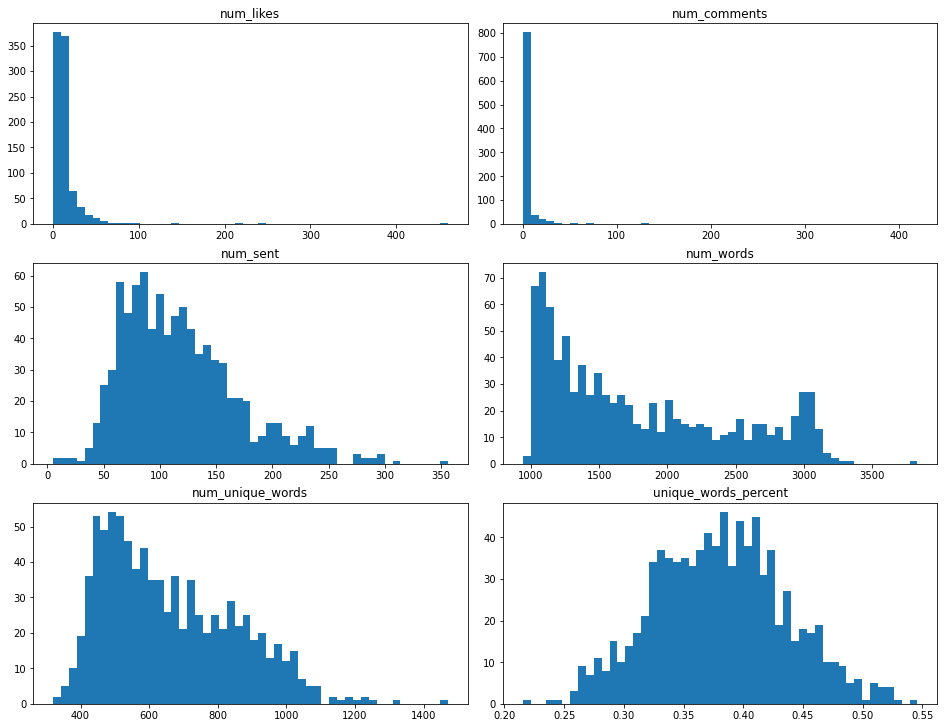

In [25]:
my_j = len(numerical) // 2
f, ax = plt.subplots(my_j, 2, figsize=(13, 10), constrained_layout=True)
feat_iter = iter(numerical)
for i in range(my_j):
    for j in range(2):
      try:
        x = next(feat_iter)
        ax[i,j].hist(df[x], bins=50)
        ax[i,j].set_title(x)
      except StopIteration:
          pass

Distribution of target

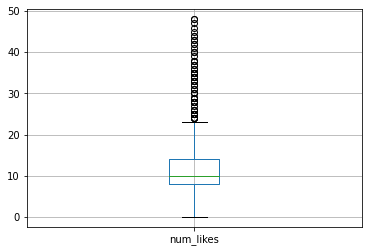

In [11]:
threshold = 50
df[df.num_likes < threshold].boxplot(column='num_likes');

Distribution of categorical features:

In [12]:
categories = [col for col in df if col.startswith('cat')]
categories.remove('cat_Fiction')
# for cat in categories:
#   df.boxplot(column='num_likes', by=cat, vert=False)
#   plt.title(f'num_likes distribution per {cat}')
#   plt.suptitle('')
#   plt.show()

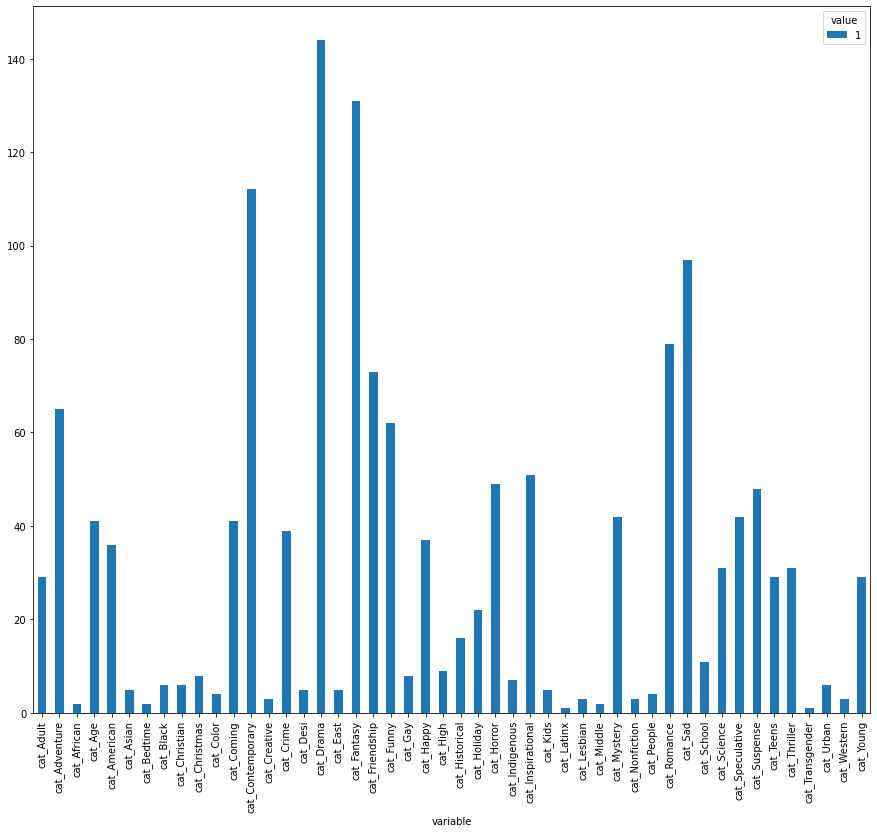

In [13]:
dfm = df[categories].melt()
dfm = dfm[dfm.value == 1]
plot_df = (
    pd.crosstab(dfm['variable'], dfm['value'])
)
plot_df.plot.bar(figsize=(15,13))
# plt.tight_layout()
plt.show()


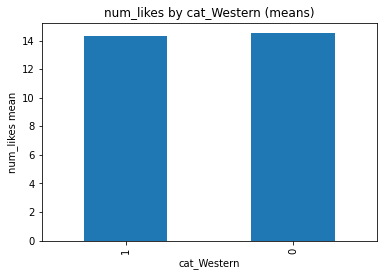

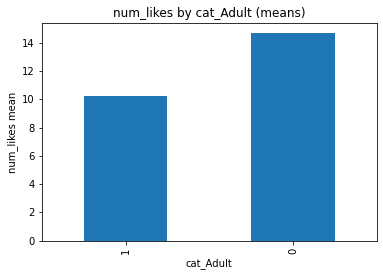

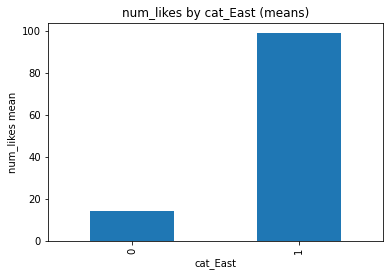

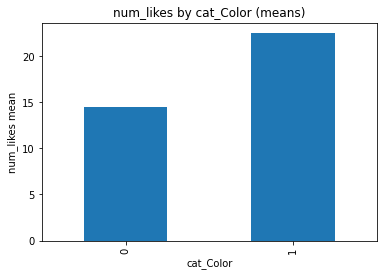

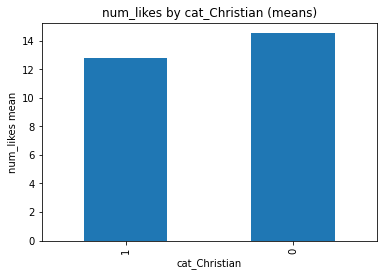

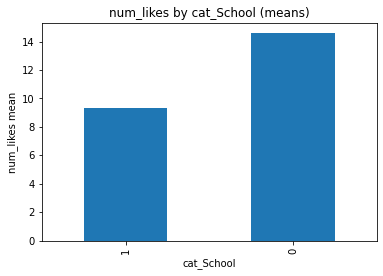

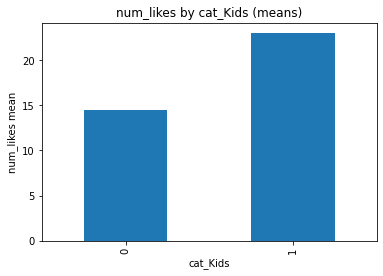

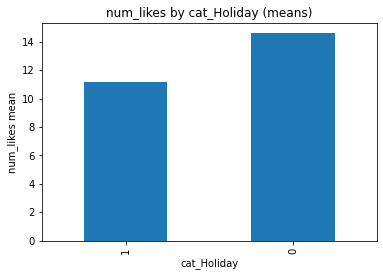

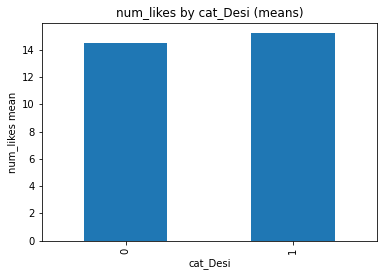

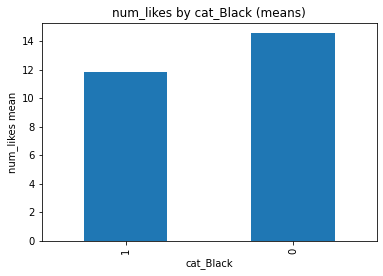

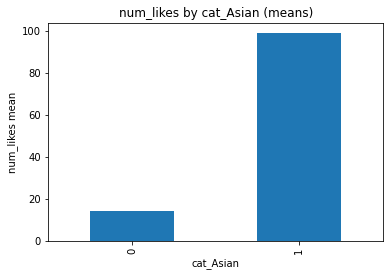

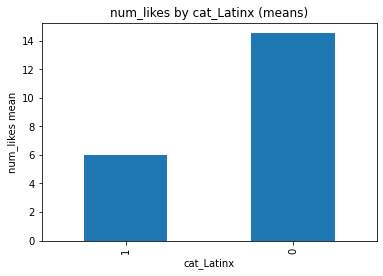

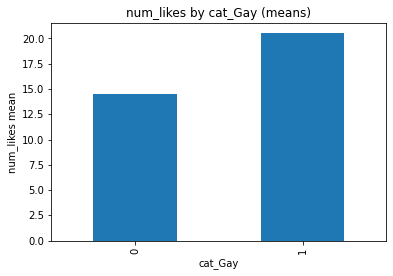

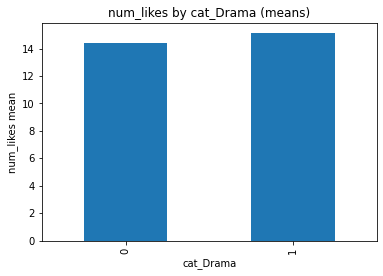

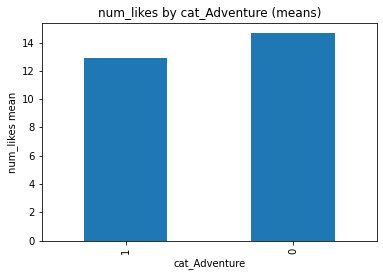

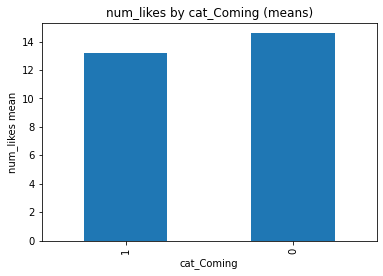

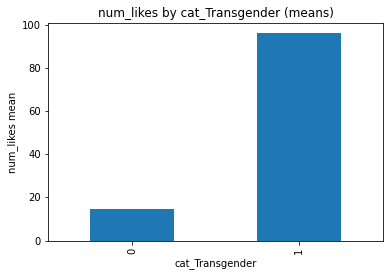

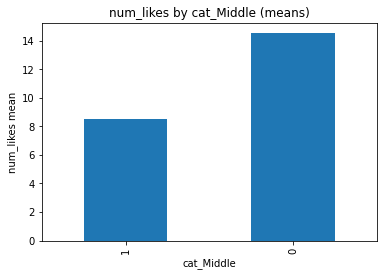

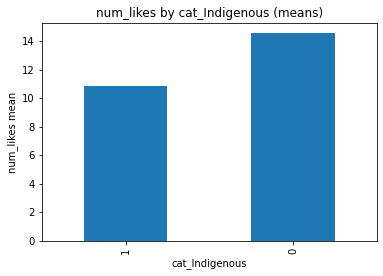

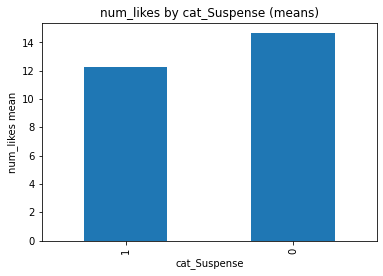

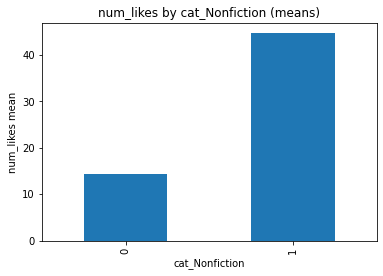

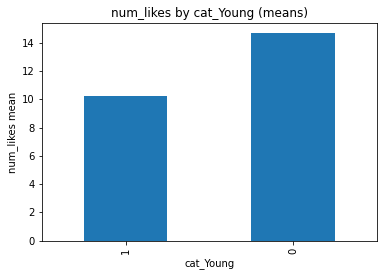

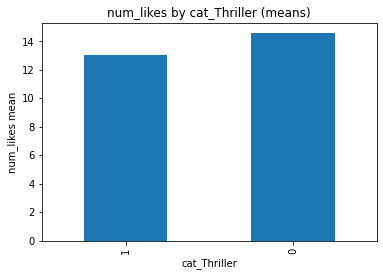

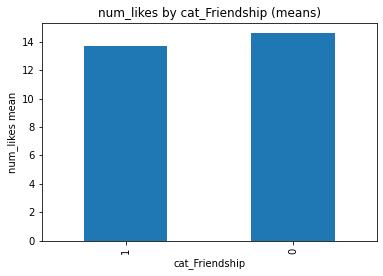

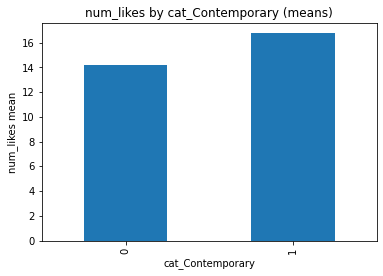

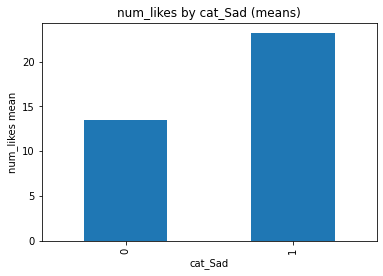

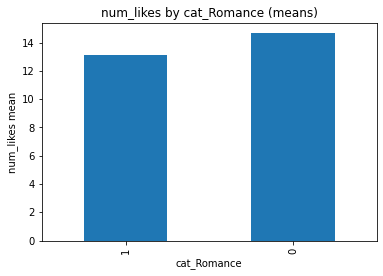

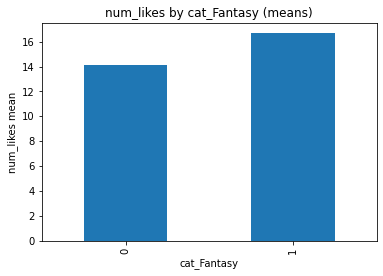

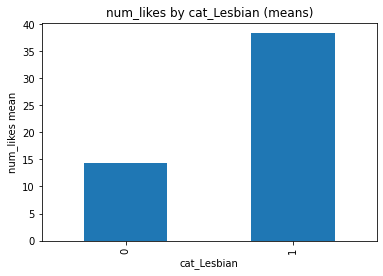

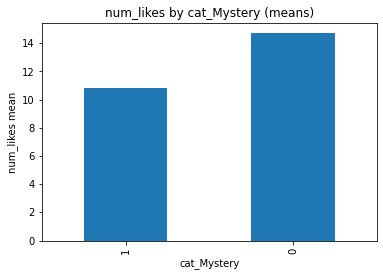

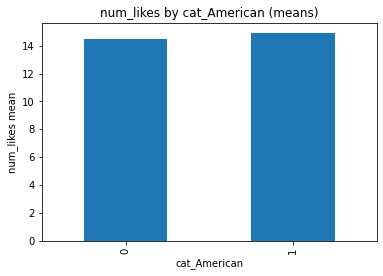

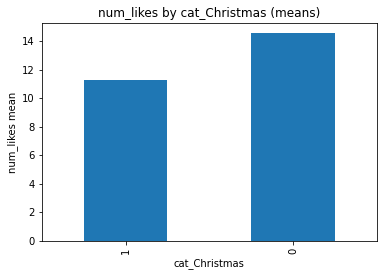

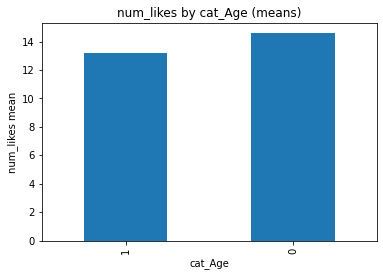

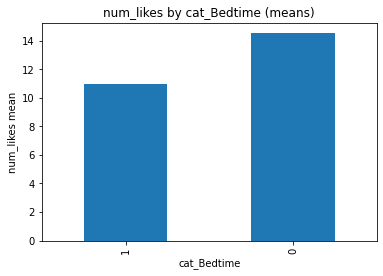

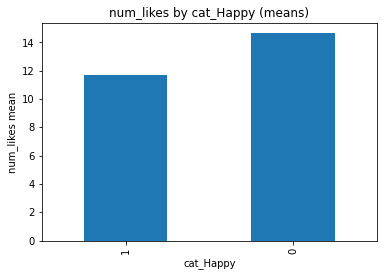

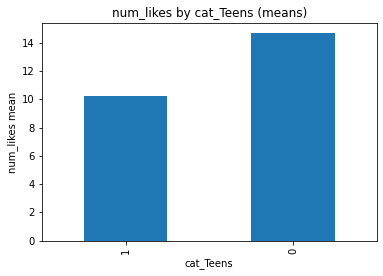

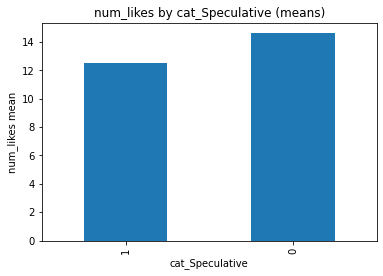

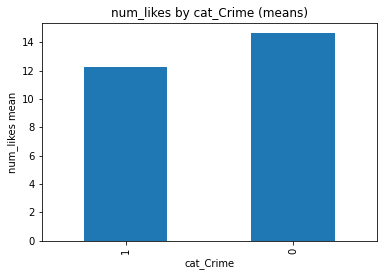

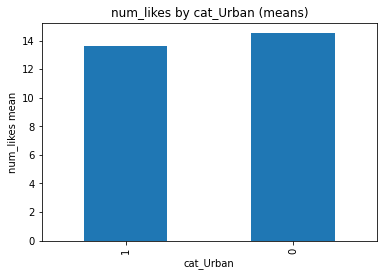

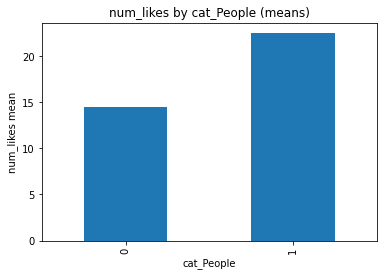

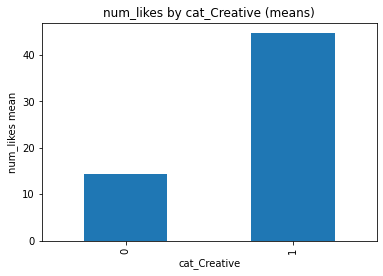

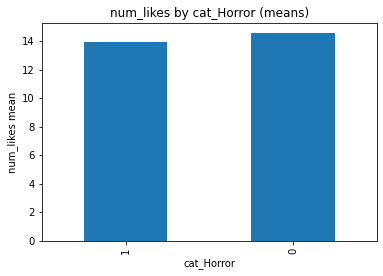

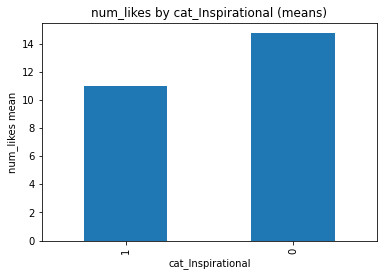

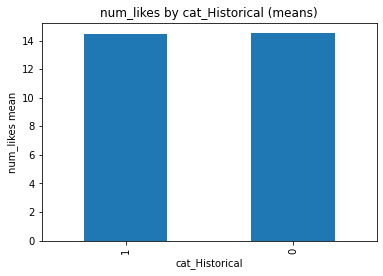

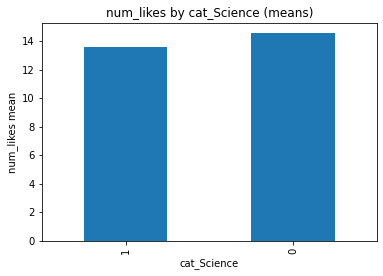

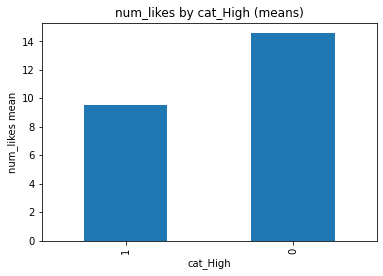

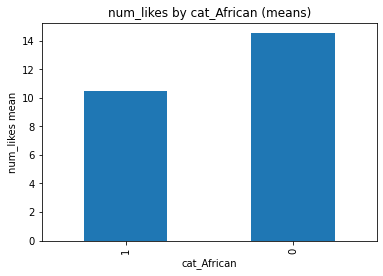

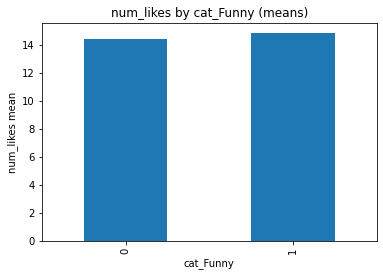

In [14]:
target = 'num_likes'
for var_to_plot in categories:
    df.groupby(var_to_plot)[target].mean().sort_values().plot.bar()
    plt.title(f"{target} by {var_to_plot} (means)")
    plt.ylabel(f"{target} mean")
    plt.show()

## Against target

Correlation of numerical features with target

In [15]:
target = 'num_likes'
threshold = 400
for my_var in numerical:
  print(my_var ,'=', df[df.num_likes < threshold][my_var].corr(df[df.num_likes < threshold][target]))

num_likes = 1.0
num_comments = 0.6432392097337741
num_sent = 0.0012154643517730697
num_words = -0.007867821676788045
num_unique_words = 0.014225364162614685
unique_words_percent = 0.039132680676617404
num_cats = 0.014443147345231538


Number of likes is our target, so it should be highly correlated with itself (threshold is offset).

Number of comments, as suspected, is highly correlated as well.

The length of the story doesn't seem to have much of a linear correlation with the target.

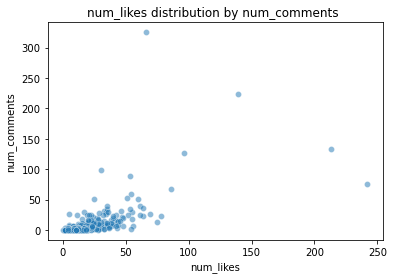

In [16]:
var_to_plot = 'num_comments'
sns.scatterplot(y = var_to_plot, x = target, data = df[df.num_likes<threshold], alpha = 0.5);
plt.title(target + f' distribution by {var_to_plot} ');


Pretty good indicator for at least a certain number of likes.

## Correlation between features

In [17]:
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.2  else 'black'
    return 'color: %s' % color

corr = df[numerical].corr()
df_styled = corr.style.applymap(color_map)
df_styled

,num_likes,num_comments,num_sent,num_words,num_unique_words,unique_words_percent,num_cats
num_likes,1.000000,0.800481,-0.012056,-0.018921,-0.000451,0.037905,0.034569
num_comments,0.800481,1.000000,-0.016530,-0.002785,0.016958,0.027381,0.020650
num_sent,-0.012056,-0.016530,1.000000,0.747821,0.646353,-0.564035,0.023788
num_words,-0.018921,-0.002785,0.747821,1.000000,0.918999,-0.664380,0.050870
num_unique_words,-0.000451,0.016958,0.646353,0.918999,1.000000,-0.345331,0.052126
unique_words_percent,0.037905,0.027381,-0.564035,-0.664380,-0.345331,1.000000,-0.022743
num_cats,0.034569,0.020650,0.023788,0.050870,0.052126,-0.022743,1.000000


## Date published

In [18]:
# plots

## Kmeans & PCA

In [19]:
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab


In [20]:
cols = numerical + categories
X = df[cols].head(300)
print(f'The shape of X is {X.shape}')

The shape of X is (300, 55)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_ss = scaler.transform(X)
X = pd.DataFrame(data=X_ss, columns=X.columns)
X.shape

(300, 55)

In [21]:
titles = df.head(300).title.values
titles = [re.sub('[^A-Za-z0-9]+', '', x.title()) for x in titles]

In [22]:
# choose the number of clusters
k = 3

In [30]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

In [31]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

In [32]:
df_pca_comps = pd.DataFrame(pca.components_, columns = X.columns)
tops_comps = pd.DataFrame(df_pca_comps.apply(lambda x:list(X.columns[np.array(x)\
                                        .argsort()[::-1][:3]]), 
                                      axis=1).to_list(),  
                   columns=['Most Important Feature', 
                            '2nd Most Important Feature', 
                            '3rd Most Important Feature'])
tops_comps.index.name = 'component_no'
tops_comps

,Most Important Feature,2nd Most Important Feature,3rd Most Important Feature
component_no,,,
0,cat_Young,cat_Teens,cat_Adult
1,cat_Asian,cat_East,num_comments


Text(0, 0.5, 'PC2')

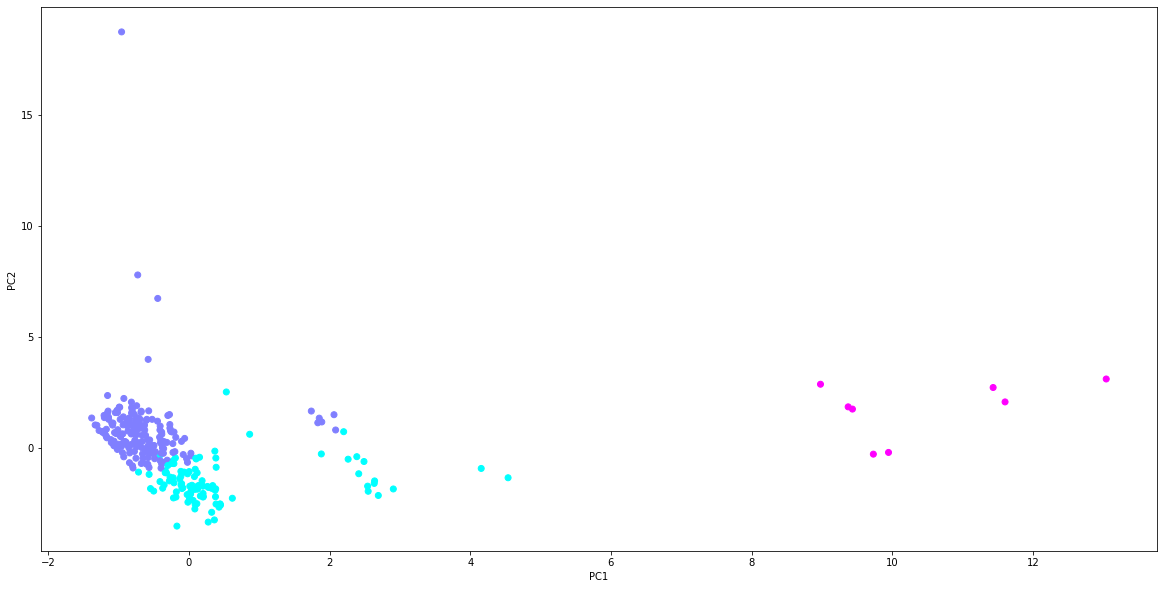

In [34]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
# for i, word in enumerate(titles):
#     ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

# EDA after feature engineering

## sentiment 

## ??